In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [44]:
data = pd.read_csv("/content/World Energy Consumption.csv")
data = pd.DataFrame(data)

In [45]:
data.columns.values.tolist()

['iso_code',
 'country',
 'year',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'gas_prod_change_pct',
 'gas_prod_change_twh',
 'oil_prod_change_pct',
 'oil_prod_change_twh',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'biofuel_share_elec',
 'biofuel_elec_per_capita',
 'biofuel_cons_change_pct',
 'biofuel_share_energy',
 'biofuel_cons_change_twh',
 'biofuel_consumption',
 'biofuel_cons_per_capita',
 'carbon_intensity_elec',
 'coal_share_elec',
 'coal_cons_change_pct',
 'coal_share_energy',
 'coal_cons_change_twh',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_cons_per_capita',
 'coal_production',
 'coal_prod_per_capita',
 'electricity_generation',
 'biofuel_electricity',
 'coal_electricity',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'other_renewable_electricity',
 'other_renewable_exc_biofuel_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity',
 'energy_per_gdp',
 '

In [46]:
column_subset = [
    # Country info
    'iso_code', 'country', 'year', 'gdp', 'population', 'energy_per_gdp', 'energy_per_capita',
    # Energy consumption
    'biofuel_consumption', 'fossil_fuel_consumption', 'coal_consumption', 'gas_consumption', 'hydro_consumption',  
    'nuclear_consumption', 'oil_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption',
    # Energy production
    'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity',
    'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity',
    ]


In [47]:
df = data.filter(column_subset)
df = df[df['year']>=1990]
df

,iso_code,country,year,gdp,population,energy_per_gdp,energy_per_capita,biofuel_consumption,fossil_fuel_consumption,coal_consumption,...,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,renewables_electricity,solar_electricity,wind_electricity
90,AFG,Afghanistan,1990,2.702746e+10,12412000.0,1.170,2548.097,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,AFG,Afghanistan,1991,2.407639e+10,13299000.0,0.567,1026.439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,AFG,Afghanistan,1992,2.447247e+10,14486000.0,0.366,618.620,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,AFG,Afghanistan,1993,1.836324e+10,15817000.0,0.487,564.895,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,AFG,Afghanistan,1994,1.427119e+10,17076000.0,0.604,504.612,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,2.503057e+10,13815000.0,2.223,4027.628,0.0,NaN,NaN,...,0.128,4.312,4.312,0.0,4.940,0.0,0.0,5.076,0.008,0.0
17428,ZWE,Zimbabwe,2016,2.515176e+10,14030000.0,1.889,3385.574,0.0,NaN,NaN,...,0.147,3.715,3.715,0.0,2.955,0.0,0.0,3.111,0.009,0.0
17429,ZWE,Zimbabwe,2017,NaN,14237000.0,NaN,NaN,0.0,NaN,NaN,...,0.151,3.219,3.219,0.0,3.929,0.0,0.0,4.091,0.011,0.0
17430,ZWE,Zimbabwe,2018,NaN,14439000.0,NaN,NaN,0.0,NaN,NaN,...,0.187,3.932,3.932,0.0,5.000,0.0,0.0,5.201,0.014,0.0


In [34]:
df.columns.values.tolist()

['iso_code',
 'country',
 'year',
 'gdp',
 'population',
 'energy_per_gdp',
 'energy_per_capita',
 'biofuel_consumption',
 'fossil_fuel_consumption',
 'coal_consumption',
 'gas_consumption',
 'hydro_consumption',
 'nuclear_consumption',
 'oil_consumption',
 'renewables_consumption',
 'solar_consumption',
 'coal_electricity',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity']

In [48]:
# fill null values
nulls=df.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        df[i].ffill(inplace=True)
        df[i].bfill(inplace=True)

In [9]:
fig = px.choropleth(df, color="renewables_consumption",
                    locations="iso_code", 
                    color_continuous_scale=[[0, 'rgb(240,240,240)'],
                      [0.1, 'rgb(13,136,198)'],
                      [0.25, 'rgb(191,247,202)'],
                      [0.5, 'rgb(4,145,32)'],
                      [1, 'rgb(227,26,28,0.5)']], title = 'Renewable Energy Consumption')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.update_layout(title_x=0.5, title_y=0.95)
fig.show()

In [10]:
fig = px.choropleth(df, color="energy_per_gdp",
                    locations="iso_code", 
                    color_continuous_scale=[[0, 'rgb(240,240,240)'],
                      [0.1, 'rgb(13,136,198)'],
                      [0.25, 'rgb(191,247,202)'],
                      [0.5, 'rgb(4,145,32)'],
                      [1, 'rgb(227,26,28,0.5)']], title = 'Energy Intensity')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.update_layout(title_x=0.5, title_y=0.95)
fig.show()

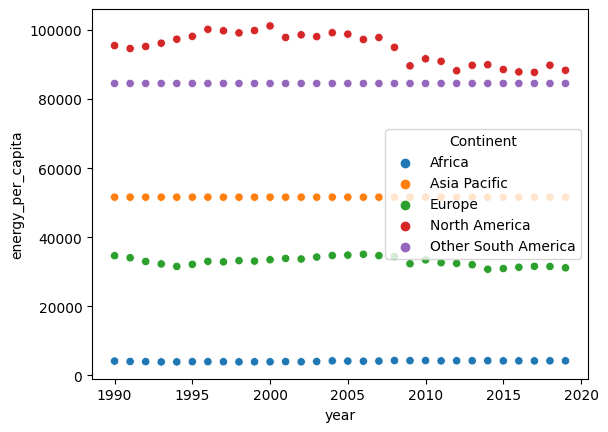

In [12]:
#continents = ['Africa', 'Asia Pacific', 'Other South America', 'Europe', 'North America']
df_temp = df[df['country'].isin(['Africa', 'Asia Pacific', 'Other South America', 'Europe', 'North America'])]
#df_temp
# plot energy per capita 
sns.scatterplot(data=df_temp, x='year', y='energy_per_capita', hue='country')
plt.legend(title='Continent', loc='best')

In [13]:
grouped = df[df['iso_code'].notnull()].groupby('country')

# Create a new DataFrame to store the slope values for each country
slope_df = pd.DataFrame(columns=['country', 'slope'])

# Iterate over each group
for country, data in grouped:
    # Extract the years and the column values
    years = data['year'].values.reshape(-1, 1)
    values = data['renewables_consumption'].values.reshape(-1, 1)
    
    # Fit a linear regression model
    model = LinearRegression().fit(years, values)
    
    # Extract the slope coefficient
    slope = model.coef_[0][0]
    
    # Add the slope value to the DataFrame
    slope_df = slope_df.append({'country': country, 'slope': slope}, ignore_index=True)
    
# Print the DataFrame
print(slope_df)

            country         slope
0       Afghanistan -1.331192e-31
1            Africa  8.785955e+00
2           Albania -2.662383e-31
3           Algeria  2.788142e-02
4    American Samoa  2.079987e-33
..              ...           ...
237           World  3.968302e+02
238           Yemen  0.000000e+00
239      Yugoslavia  1.995921e-29
240          Zambia  0.000000e+00
241        Zimbabwe  0.000000e+00

[242 rows x 2 columns]


In [14]:
top_10_countries = slope_df[slope_df['country'].isin(['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 
                                          'Canada', 'South Korea', 'Russia', 'Brazil', 'Australia', 'Spain', 'Indonesia'])]
top_10_countries = top_10_countries.sort_values(by='slope')
top_10_countries

,country,slope
180,Russia,-0.227413
201,South Korea,2.041253
99,Indonesia,3.068746
11,Australia,3.376106
75,France,3.984276
106,Japan,5.411065
104,Italy,7.089990
36,Canada,7.464823
203,Spain,8.493334
226,United Kingdom,9.522602


<Axes: xlabel='country'>

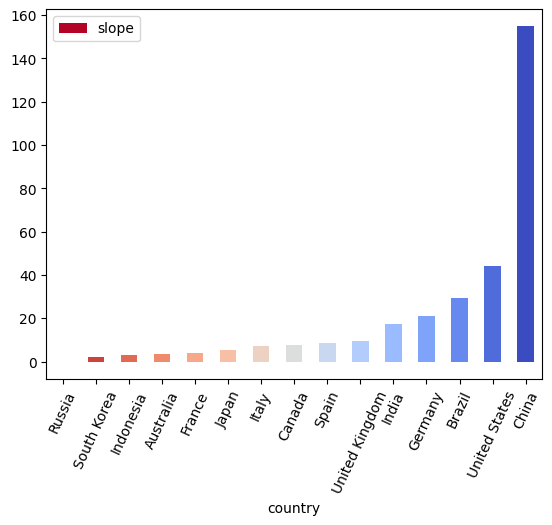

In [15]:
cmap = plt.get_cmap('coolwarm_r')
top_10_countries.plot.bar(x='country', y='slope', color=cmap(np.linspace(0, 1, len(top_10_countries))), rot=65)

In [16]:
grouped = df[df['iso_code'].notnull()].groupby('country')

# Create a new DataFrame to store the slope values for each country
slope_df = pd.DataFrame(columns=['country', 'slope'])

# Iterate over each group
for country, data in grouped:
    # Extract the years and the column values
    years = data['year'].values.reshape(-1, 1)
    values = data['fossil_fuel_consumption'].values.reshape(-1, 1)
    
    # Fit a linear regression model
    model = LinearRegression().fit(years, values)
    
    # Extract the slope coefficient
    slope = model.coef_[0][0]
    
    # Add the slope value to the DataFrame
    slope_df = slope_df.append({'country': country, 'slope': slope}, ignore_index=True)
    
# Print the DataFrame
print(slope_df)

            country         slope
0       Afghanistan  0.000000e+00
1            Africa  9.701766e+01
2           Albania -4.259813e-30
3           Algeria  1.350654e+01
4    American Samoa -1.064953e-30
..              ...           ...
237           World  2.088132e+03
238           Yemen -1.363140e-28
239      Yugoslavia  0.000000e+00
240          Zambia -1.363140e-28
241        Zimbabwe -1.363140e-28

[242 rows x 2 columns]


In [17]:
top_10_countries = slope_df[slope_df['country'].isin(['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 
                                          'Canada', 'South Korea', 'Russia', 'Brazil', 'Australia', 'Spain', 'Indonesia'])]
top_10_countries = top_10_countries.sort_values(by='slope')
top_10_countries

,country,slope
81,Germany,-25.462202
180,Russia,-24.298004
226,United Kingdom,-21.071133
104,Italy,-10.848453
75,France,-9.891752
106,Japan,6.069427
203,Spain,9.898321
11,Australia,20.208125
36,Canada,23.541964
227,United States,33.986796


<Axes: xlabel='country'>

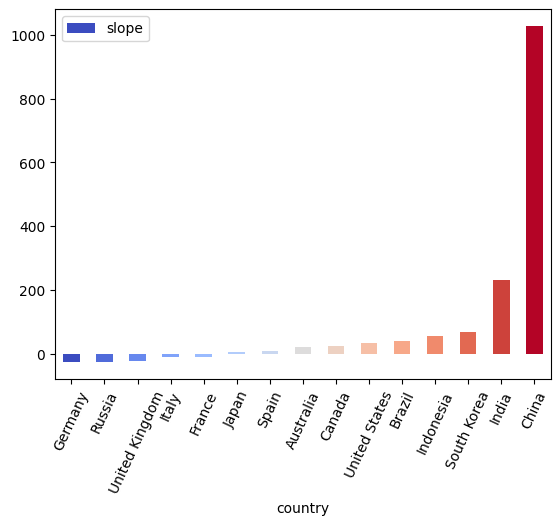

In [18]:
cmap = plt.get_cmap('coolwarm')
top_10_countries.plot.bar(x='country', y='slope', color=cmap(np.linspace(0, 1, len(top_10_countries))), rot=65)

(0.0, 1.0, 0.0, 1.0)

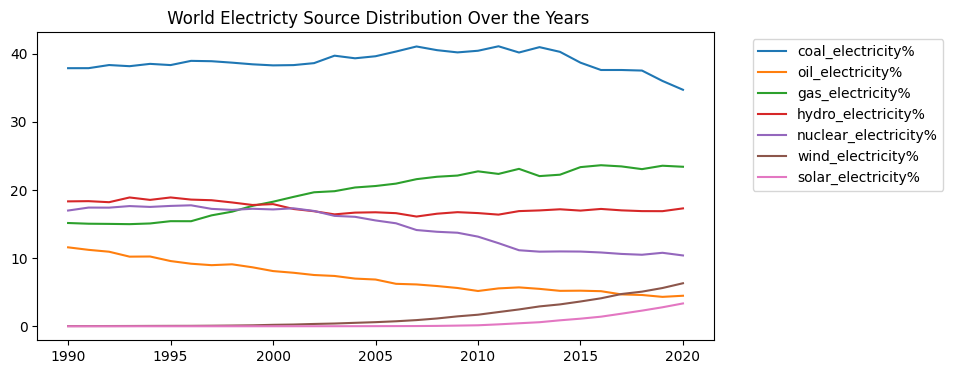

In [29]:
# world energy consumption
cols =['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
df['total']=df[cols].sum(axis=1)
df_electricity=df[['year','country']]
for i in cols:
    df_electricity[f"{i}%"]=round(100*(df[i]/df['total']),4)
# plot the change in the percentage over the years
fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_df=df_electricity[df_electricity['country']=='World'].groupby('year').mean()
ax[0].plot(chart_df,label=chart_df.columns)
ax[0].set_title(" World Electricty Source Distribution Over the Years")
ax[0].legend(bbox_to_anchor=(1.35, 1), loc="upper right")
ax[1].axis('off')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper right")

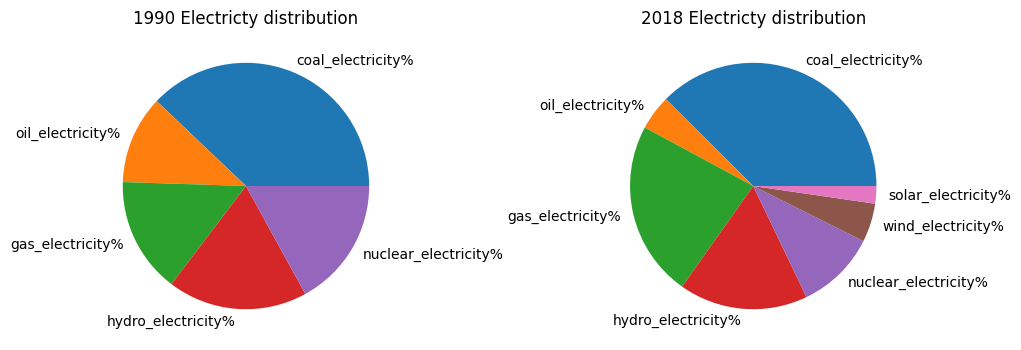

In [66]:
#plot the pie charts for energy distribution and compare 1990 Vs 2018
years=[1990,2018]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_df_pie_1=chart_df[(chart_df.index.values==y)]
    for i in chart_df_pie_1.columns:
        if chart_df_pie_1.iloc[0][i]<1:
            chart_df_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_df_pie_1.iloc[0].values,labels=chart_df_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()

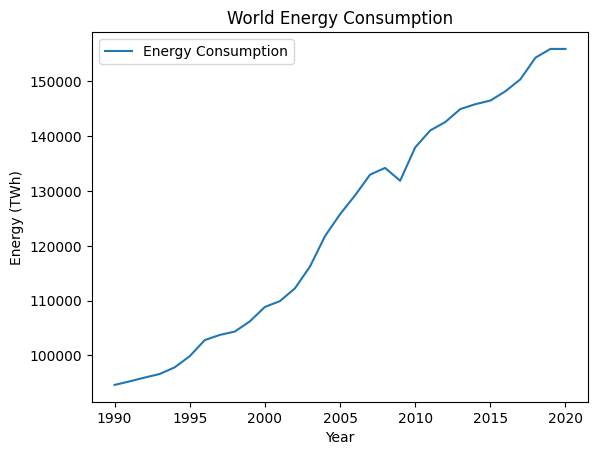

In [62]:
# Create world consumption vs production plot

consumptions_to_sum = ['coal_consumption','gas_consumption','hydro_consumption','nuclear_consumption','oil_consumption','solar_consumption']
production_to_sum = ['coal_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','solar_electricity', 'wind_electricity']
condition_column = 'country'
condition_value = 'World'

# filter the rows that meet the condition
filtered_df = df[df['country'] == 'World']

# sum up the selected columns for the filtered rows
filtered_df['total_consumption'] = filtered_df[consumptions_to_sum].sum(axis=1)
filtered_df['total_production'] = filtered_df[production_to_sum].sum(axis=1)




plt.plot(filtered_df['year'], filtered_df['total_consumption'], label='Energy Consumption')
#plt.plot(filtered_df['year'], filtered_df['total_production'], label='Energy Production')

# Customize the plot
plt.title('World Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy (TWh)')
plt.legend()

# Display the plot
plt.show()

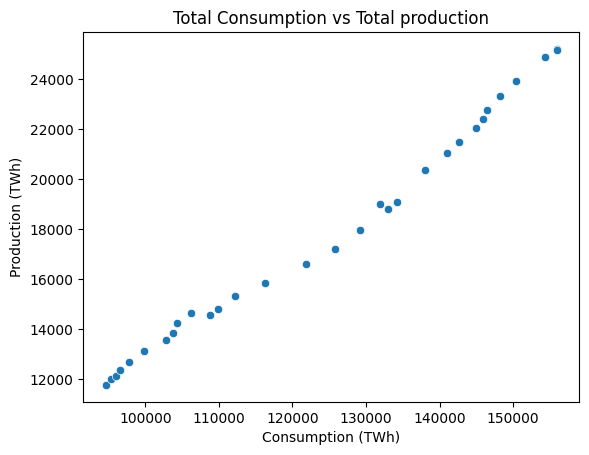

In [65]:
sns.scatterplot(x='total_consumption', y='total_production', data=filtered_df)
plt.title('Total Consumption vs Total production')
plt.xlabel('Consumption (TWh)')
plt.ylabel('Production (TWh)')
plt.show()

In [ ]:
# set the 'Year' column as the index
df.set_index('year', inplace=True)

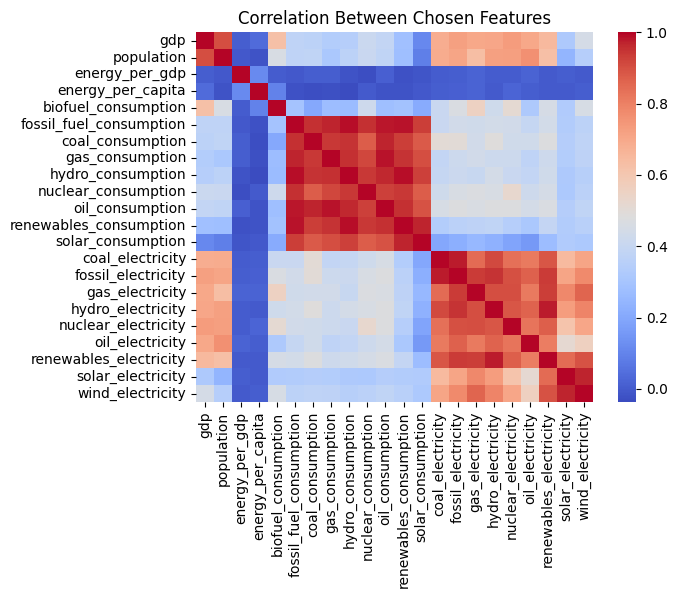

In [79]:
# create a correlation matrix between all variables
corr_matrix = df[['country',
 'gdp',
 'population',
 'energy_per_gdp',
 'energy_per_capita',
 'biofuel_consumption',
 'fossil_fuel_consumption',
 'coal_consumption',
 'gas_consumption',
 'hydro_consumption',
 'nuclear_consumption',
 'oil_consumption',
 'renewables_consumption',
 'solar_consumption',
 'coal_electricity',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity']].corr()

# create a heatmap of the correlation matrix 
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Between Chosen Features')
plt.show()